In [2]:
import pandas as  pd
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch


data = pd.read_excel('C:/Users/NAVYA .P/Desktop/360digitmg_assignments/5th assignment/EastWestAirlines.xlsx','data')

In [3]:
data.drop('ID#', inplace = True, axis  =1) # removing the first column

# datapre-processing
# performing standardization on whole data.
df = StandardScaler().fit_transform(data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']])

df = pd.DataFrame(df)
df


,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,0.684037,1.106414,-0.769578,13.448976,-0.062767,0.287650,3.686300,2.992744,5.965781,-0.441944
3995,-0.086116,-0.186299,-0.769578,13.448976,-0.062767,-0.090022,0.145596,-0.328603,-0.362168,-1.031325
3996,-0.500226,-0.186299,-0.769578,13.448976,-0.062767,-0.271570,0.145596,-0.221463,-0.098503,-1.148524
3997,-0.360264,-0.186299,-0.769578,13.448976,-0.062767,0.273943,0.770426,-0.328603,-0.362168,-1.667199


In [4]:
df['Award?'] = data['Award?'].values
df.columns = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll','Award']
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.684037,1.106414,-0.769578,13.448976,-0.062767,0.287650,3.686300,2.992744,5.965781,-0.441944,1
3995,-0.086116,-0.186299,-0.769578,13.448976,-0.062767,-0.090022,0.145596,-0.328603,-0.362168,-1.031325,0
3996,-0.500226,-0.186299,-0.769578,13.448976,-0.062767,-0.271570,0.145596,-0.221463,-0.098503,-1.148524,0
3997,-0.360264,-0.186299,-0.769578,13.448976,-0.062767,0.273943,0.770426,-0.328603,-0.362168,-1.667199,0


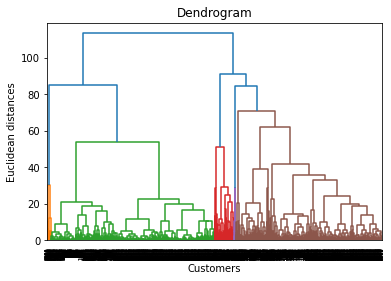

In [11]:
%matplotlib inline
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [1]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

h_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete', affinity = "euclidean").fit(df) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

df['clust'] = cluster_labels # creating a new column and assigning it to new column 

df1 = df.iloc[:, [11,0,1,2,3,4,5,6,7,8,9,10]]
df1.head(15)

NameError: name 'df' is not defined